## Importing Libraries ##

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

## Data Loading, Exploration and Cleaning ##

In [2]:
df = pd.read_csv('data/petrol_consumption.csv')
df.head(5)

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [3]:
df.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Petrol_tax                    48 non-null     float64
 1   Average_income                48 non-null     int64  
 2   Paved_Highways                48 non-null     int64  
 3   Population_Driver_licence(%)  48 non-null     float64
 4   Petrol_Consumption            48 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


In [5]:
for col in df.columns:
    print(f'{col} unique values : {df[col].unique()}')

Petrol_tax unique values : [ 9.    7.5   8.   10.    7.    8.5   6.58  5.    6.  ]
Average_income unique values : [3571 4092 3865 4870 4399 5342 5319 5126 4447 4512 4391 4817 4207 4332
 4318 4206 3718 4716 4341 4593 4983 4897 4258 4574 3721 3448 3846 4188
 3601 3640 3333 3063 3357 3528 3802 4045 3897 3635 4345 4449 3656 4300
 3745 5215 4476 4296 5002]
Paved_Highways unique values : [ 1976  1250  1586  2351   431  1333 11868  2138  8577  8507  5939 14186
  6930  6580  8159 10340  8508  4725  5915  6010  7834   602  2449  4686
  2619  4746  5399  9061  5975  4650  6905  6594  6524  4121  3495 17782
  6385  3274  3905  4639  3985  3635  2611  2302  3942  4083  9794]
Population_Driver_licence(%) unique values : [0.525 0.572 0.58  0.529 0.544 0.571 0.451 0.553 0.552 0.53  0.574 0.545
 0.608 0.586 0.54  0.724 0.677 0.663 0.602 0.511 0.517 0.551 0.548 0.579
 0.563 0.493 0.518 0.513 0.578 0.547 0.487 0.629 0.566 0.672 0.626 0.603
 0.508 0.623 0.593]
Petrol_Consumption unique values : [541 524 

In [7]:
X = df.drop(['Petrol_Consumption'],axis=1).copy()
X.head(3)

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%)
0,9.0,3571,1976,0.525
1,9.0,4092,1250,0.572
2,9.0,3865,1586,0.580


In [8]:
y = df['Petrol_Consumption'].copy()
y.head(3)

0    541
1    524
2    561
Name: Petrol_Consumption, dtype: int64

## Dataset Split and Model Intialization ##

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.6, shuffle=True)

In [10]:
reg = DecisionTreeRegressor(min_samples_leaf=4, random_state=42)

In [11]:
reg.fit(X_train,y_train)

DecisionTreeRegressor(min_samples_leaf=4, random_state=42)

[Text(0.6666666666666666, 0.9166666666666666, 'Population_Driver_licence(%) <= 0.646\nsquared_error = 10431.245\nsamples = 28\nvalue = 598.571'),
 Text(0.5, 0.75, 'Average_income <= 4419.0\nsquared_error = 5751.123\nsamples = 24\nvalue = 577.292'),
 Text(0.3333333333333333, 0.5833333333333334, 'Population_Driver_licence(%) <= 0.535\nsquared_error = 3672.136\nsamples = 18\nvalue = 607.444'),
 Text(0.16666666666666666, 0.4166666666666667, 'squared_error = 1357.84\nsamples = 5\nvalue = 556.6'),
 Text(0.5, 0.4166666666666667, 'Average_income <= 4116.5\nsquared_error = 3185.538\nsamples = 13\nvalue = 627.0'),
 Text(0.3333333333333333, 0.25, 'Average_income <= 3824.0\nsquared_error = 2282.484\nsamples = 8\nvalue = 652.625'),
 Text(0.16666666666666666, 0.08333333333333333, 'squared_error = 1302.688\nsamples = 4\nvalue = 671.25'),
 Text(0.5, 0.08333333333333333, 'squared_error = 2568.5\nsamples = 4\nvalue = 634.0'),
 Text(0.6666666666666666, 0.25, 'squared_error = 1898.8\nsamples = 5\nvalue = 

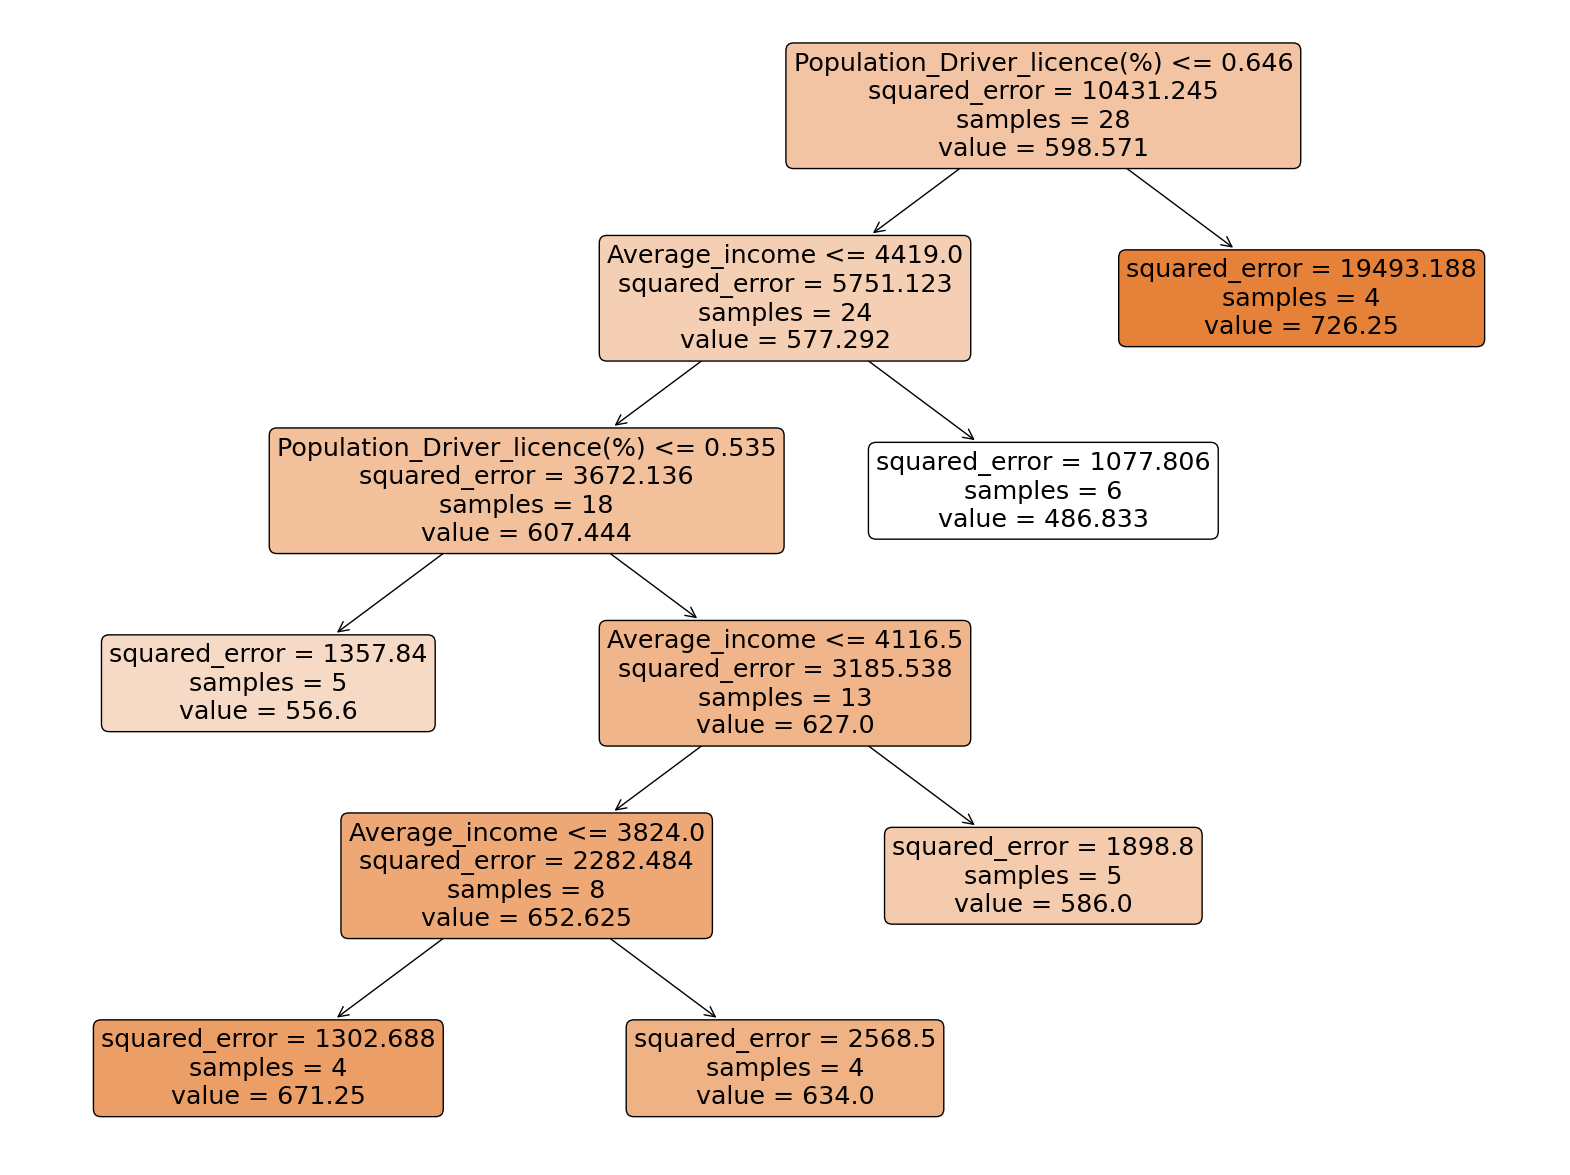

In [16]:
plt.figure(figsize=(20,15))
plot_tree(reg,
         rounded=True,
         filled=True,
         feature_names=X.columns)

## Model Accuracy ##

In [18]:
y_pred = reg.predict(X_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 66.10249999999999
Mean Squared Error: 6826.857402777778
Root Mean Squared Error: 82.62479895756344
